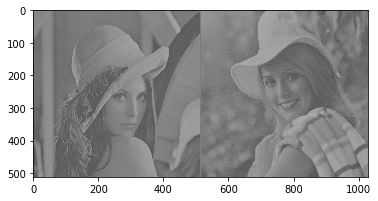

In [63]:
#画像生成用
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
rate = 0.00001 #雑音率
img1 = imread('image1.png')
img2 = imread('image2.png')
h1,w1 = np.shape(img1)
h2,w2 = np.shape(img2)
img1 = img1.flatten()
for i in range(h1*w1):
    if np.random.rand() < rate:
        img1[i] = np.random.rand() #雑音を混ぜる
img1 = img1.reshape(h1,w1)
plt.imsave('imga_0.00001_3.png',img1,cmap='gray')
img1 = img1.flatten()
'''
img2 = img2.flatten()
for i in range(h1*w1):
    if np.random.rand() < rate:
        img2[i] = np.random.rand() #雑音を混ぜる
img2 = img2.reshape(h2,w2)
'''
plt.imsave('imga_0.00001_4.png',img2,cmap='gray')
img2 = img2.flatten()      
data = [img1,img2]

#独立成分分析
data_ica = ICA(data).main()

#画像を表示
img1_ica = data_ica[0].reshape(h1,w1)
img2_ica = data_ica[1].reshape(h2,w2)
plt.imsave('imga_0.00001_1.png',img1_ica,cmap='gray')
plt.imsave('imga_0.00001_2.png',img2_ica,cmap='gray')
zero = np.zeros((h1,5))
img_ica = np.hstack((img1_ica,zero,img2_ica))
plt.imshow(img_ica,cmap = 'gray')

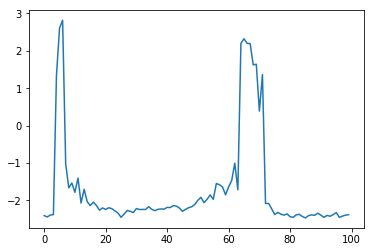

In [4]:
#レポート内で使用(片方のデータに雑音を付与)
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        count = 0
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                count += 1
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                if count > 1000:
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
def benchmark():
    record = []
    for k in range(100):
        rate = 10**(-k/20) #雑音率
        time_rec = []
        for i in range(20):
            img1 = imread('image1.png')
            img2 = imread('image2.png')
            h1,w1 = np.shape(img1)
            h2,w2 = np.shape(img2)
            img1 = img1.flatten()
            for i in range(h1*w1):
                if np.random.rand() < rate:
                    img1[i] = np.random.rand()
            img2 = img2.flatten()
            data = [img1,img2]
            t = time.time()
            data_ica = ICA(data).main()
            time_rec.append(time.time() - t)
            
        time_rec.sort()
        sum = 0
        for i in time_rec[3:17]: #上と下の3個のデータを外れ値対策として切り捨て
            sum += i
        record.append(math.log(sum/14)) #時間は対数を取る
    x = [i for i in range(100)]
    plt.plot(x,record)
    plt.show()
    
benchmark()  


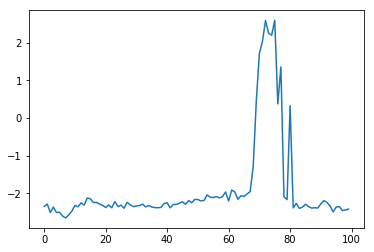

In [22]:
#レポート内で使用(両方のデータに雑音を付与)
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        count = 0
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                count += 1
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                if count > 1000:
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
def benchmark():
    record = []
    for k in range(100):
        rate = 10**(-k/20) #雑音率
        time_rec = []
        for i in range(20):
            img1 = imread('image1.png')
            img2 = imread('image2.png')
            h1,w1 = np.shape(img1)
            h2,w2 = np.shape(img2)
            img1 = img1.flatten()
            for i in range(h1*w1):
                if np.random.rand() < rate:
                    img1[i] = np.random.rand()
            img2 = img2.flatten()
            for i in range(h1*w1):
                if np.random.rand() < rate:
                    img2[i] = np.random.rand()
            data = [img1,img2]
            t = time.time()
            data_ica = ICA(data).main()
            time_rec.append(time.time() - t)
            
        time_rec.sort()
        sum = 0
        for i in time_rec[3:17]: #上と下の3個のデータを外れ値対策として切り捨て
            sum += i
        record.append(math.log(sum/14)) #時間は対数を取る
    x = [i for i in range(100)]
    plt.plot(x,record)
    plt.show()
    
benchmark()  


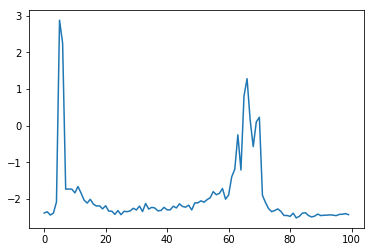

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        count = 0
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                count += 1
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                if count > 1000:
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
def benchmark():
    record = []
    for k in range(100):
        rate = 10**(-k/20) #雑音率
        time_rec = []
        for i in range(20):
            img1 = imread('image1.png')
            img2 = imread('image2.png')
            h1,w1 = np.shape(img1)
            h2,w2 = np.shape(img2)
            img1 = img1.flatten()
            for i in range(h1*w1):
                if np.random.rand() < rate:
                    img1[i] = np.random.rand()
            img2 = img2.flatten()
            data = [img1,img2]
            t = time.time()
            data_ica = ICA(data).main()
            time_rec.append(math.log(time.time() - t)) #時間は対数を取って記録する
            
        time_rec.sort()
        sum = 0
        for i in time_rec[3:17]: #上と下の3個のデータを外れ値対策として切り捨て
            sum += i
        record.append(sum/14)
    x = [i for i in range(100)]
    plt.plot(x,record)
    plt.show()
    
benchmark()  


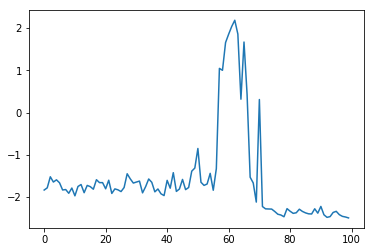

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        count = 0
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                count += 1
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                if count > 1000:
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
def benchmark():
    record = []
    for k in range(100):
        rate = 10**(-k/20) #雑音率
        time_rec = []
        for i in range(20):
            img1 = imread('image1.png')
            img2 = imread('image2.png')
            h1,w1 = np.shape(img1)
            h2,w2 = np.shape(img2)
            img1 = img1.flatten()
            for i in range(h1):
                for j in range(w1):
                    if np.random.rand() < rate:
                        img1[i] = np.random.rand()
            img2 = img2.flatten()
            data = [img1,img2]
            t = time.time()
            data_ica = ICA(data).main()
            time_rec.append(time.time() - t) #時間は対数を取って記録する
            
        time_rec.sort()
        sum = 0
        for i in time_rec[3:17]: #上と下の3個のデータを外れ値対策として切り捨て
            sum += i
        record.append(math.log((sum/14)))
    x = [i for i in range(100)]
    plt.plot(x,record)
    plt.show()
    
benchmark()  


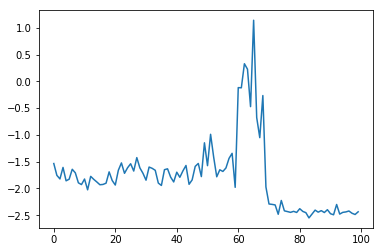

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from matplotlib.image import imread
from matplotlib.image import imsave

class ICA:
    def __init__(self,data):
        self.data = np.matrix(data)
        self.epsilon = 0.1 #収束判定用
        
    def center(self): #平均を0にシフト
        self.data -= np.average(self.data)
            
    def whiten(self): #白色化
        sigma = np.cov(self.data, bias=True)
        d,E = np.linalg.eigh(sigma) #エルミート行列対角化
        D = np.matrix((d**-0.5)*np.eye(len(d)))
        V = E * D * E.transpose()
        z = V * self.data
        return z
    
    def convergence(self,v,w): #収束判定
        if np.linalg.norm(v - w) < self.epsilon:
            return True
        else:
            return False
        
    def normalize(self,w): #正規化
        if w.sum() < 0: #向きが逆のとき
            w = -w
        return w / np.linalg.norm(w)
    
    def orthogonalize(self,w,matrix_W):
        new_matrix = np.matrix(np.vstack((matrix_W,w.transpose())))
        Q,R = np.linalg.qr(new_matrix.transpose())
        w_t = Q.transpose()[-1]
        return w_t.transpose()
    
    def optimize(self,z): #ベクトルwの探索
        matrix_W = np.empty((0,len(self.data)))
        count = 0
        for i in range(len(self.data)):
            w = np.random.rand(len(self.data),1)
            w = self.normalize(w)
            while True:
                tot_vector = np.asarray(z) * np.asarray(np.asarray(np.dot(w.transpose(),z))**3)
                new_w = np.asmatrix(np.average(tot_vector,axis=1)).transpose() - 3*w
                new_w = self.orthogonalize(new_w,matrix_W)#直交化
                new_w = self.normalize(new_w) #正規化
                count += 1
                if self.convergence(new_w,w): #収束時
                    w = new_w
                    break
                if count > 1000:
                    w = new_w
                    break
                w = new_w
            matrix_W = np.vstack((matrix_W,w.transpose())) #ベクトルwを積む
        y = matrix_W*z
        return y
        
    def main(self): #独立成分分析の本体
        self.center()
        z = self.whiten()
        y = self.optimize(z)
        return y

#データの読み込み
def benchmark():
    record = []
    for k in range(100):
        rate = 10**(-k/20) #雑音率
        time_rec = []
        for i in range(20):
            img1 = imread('image1.png')
            img2 = imread('image2.png')
            h1,w1 = np.shape(img1)
            h2,w2 = np.shape(img2)
            img1 = img1.flatten()
            for i in range(h1):
                for j in range(w1):
                    if np.random.rand() < rate:
                        img1[i] = np.random.rand()
            img2 = img2.flatten()
            data = [img1,img2]
            t = time.time()
            data_ica = ICA(data).main()
            time_rec.append(math.log(time.time() - t)) #時間は対数を取って記録する
            
        time_rec.sort()
        sum = 0
        for i in time_rec[3:17]: #上と下の3個のデータを外れ値対策として切り捨て
            sum += i
        record.append(sum/14)
    x = [i for i in range(100)]
    plt.plot(x,record)
    plt.show()
    
benchmark()  
